In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/cardataset/Car_Hacking_5.csv')

In [4]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [5]:
df.Label.value_counts()

Label
R        701832
RPM       32539
gear      29944
DoS       29501
Fuzzy     24624
Name: count, dtype: int64

In [6]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [7]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [8]:
df.describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,126.078499,113.820750,108.693338,90.323657,110.247275,105.975780,112.834149,85.514440,92.282885
std,73.287512,90.156130,93.788994,101.385858,103.746465,95.956494,91.471034,101.866466,99.494200
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.962462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.373874,126.351351,116.779279,0.000000,131.711712,127.882883,129.669670,0.000000,0.000000
75%,188.250751,193.738739,194.121622,201.524024,190.165165,193.993994,192.207207,192.845345,187.740240
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [9]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [10]:
df0.shape

(701832, 9)

In [11]:
len((df0))

701832

In [12]:
df0

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
0,227.560060,179.189189,164.384384,181.486486,152.132132,0.000000,0.000000,0.000000,214.924925
1,155.067568,184.166667,248.108108,227.560060,131.711712,134.391892,129.669670,0.000000,151.621622
2,244.406907,216.584084,0.000000,0.000000,188.761261,0.000000,0.000000,0.000000,0.000000
3,227.560060,179.189189,164.384384,181.486486,152.132132,0.000000,0.000000,0.000000,214.924925
4,15.060060,0.000000,0.000000,0.000000,0.000000,0.000000,105.548048,155.067568,236.621622
...,...,...,...,...,...,...,...,...,...
818435,166.936937,109.376877,116.779279,184.804805,173.190691,204.969970,0.000000,0.000000,135.923423
818436,217.477477,255.000000,0.000000,0.000000,0.000000,255.000000,209.947447,188.378378,0.000000
818437,166.936937,109.376877,116.779279,213.648649,173.190691,204.969970,0.000000,0.000000,183.018018
818438,244.406907,216.584084,208.798799,0.000000,190.165165,0.000000,0.000000,0.000000,0.000000


In [13]:
# Generate 9*9 color images for class 0 (Normal)
count=0
ims = []

image_path = "/kaggle/working/train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):  
    count=count+1
    if count<=27: 
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [14]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "/kaggle/working/train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):  
    count=count+1
    if count<=27: 
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [15]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "/kaggle/working/train/2/"
os.makedirs(image_path)

for i in range(0, len(df2)):  
    count=count+1
    if count<=27: 
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [16]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "/kaggle/working/train/3/"
os.makedirs(image_path)


for i in range(0, len(df3)):  
    count=count+1
    if count<=27: 
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [17]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "/kaggle/working/train/4/"
os.makedirs(image_path)


for i in range(0, len(df4)):  
    count=count+1
    if count<=27: 
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [18]:
# Create folders to store images
Train_Dir='/kaggle/working/train/'
Val_Dir='/kaggle/working/test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

29228


In [19]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [20]:
Numbers

5845

In [21]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [22]:
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [23]:
DATA_DIR_224='/kaggle/working/train_224/'
get_224(folder='/kaggle/working/train/',dstdir=DATA_DIR_224)

Finish resizing


In [24]:
DATA_DIR2_224='/kaggle/working/test_224/'
get_224(folder='/kaggle/working/test/',dstdir=DATA_DIR2_224)

Finish resizing


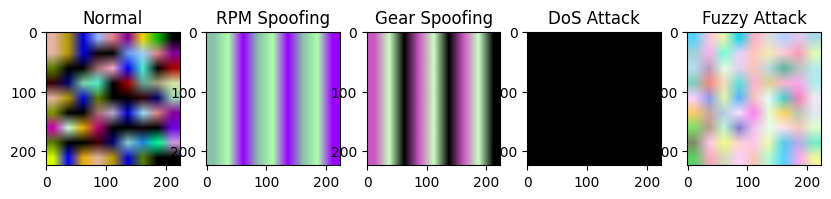

In [25]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('/kaggle/working/train_224/0/27.png')
img2 = Image.open('/kaggle/working/train_224/1/167.png')
img3 = Image.open('/kaggle/working/train_224/2/27.png')
img4 = Image.open('/kaggle/working/train_224/3/27.png')
img5 = Image.open('/kaggle/working/train_224/4/6271.png')

plt.figure(figsize=(10, 10)) 
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it

In [35]:
!ls

file.zip  test	test_224  train  train_224


In [37]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    """
    zip all the files in a directory
    
    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory
        
    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'
        
    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [38]:
zip_dir()

/kaggle/working/directory.zip

In [26]:
import os
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import  ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [27]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/working/train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/kaggle/working/test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 23383 images belonging to 5 classes.
Found 5845 images belonging to 5 classes.


In [28]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [29]:
history_this= LossHistory()

# CNN MODELS


# CNN

Epoch 1/10


I0000 00:00:1730295036.297278      92 service.cc:145] XLA service 0x788780002cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730295036.297357      92 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1730295088.640287      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 709ms/step - accuracy: 0.8855 - loss: 0.3768
Epoch 1: val_accuracy improved from -inf to 0.99949, saving model to /kaggle/working/model_cnnown.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 216s 867ms/step - accuracy: 0.8858 - loss: 0.3757 - val_accuracy: 0.9995 - val_loss: 0.0093
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9889 - loss: 0.0377
Epoch 2: val_accuracy did not improve from 0.99949
183/183 ━━━━━━━━━━━━━━━━━━━━ 113s 607ms/step - accuracy: 0.9888 - loss: 0.0378 - val_accuracy: 0.9802 - val_loss: 0.0431
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9762 - loss: 0.0460
Epoch 3: val_accuracy did not improve from 0.99949
183/183 ━━━━━━━━━━━━━━━━━━━━ 113s 607ms/step - accuracy: 0.9762 - loss: 0.0460 - val_accuracy: 0.9986 - val_loss: 0.0065
Epoch 3: early stopping
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step


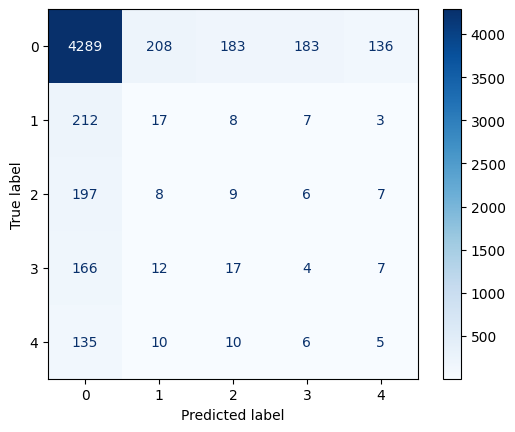

F1 Score (macro average): 0.20312598566714657
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4999
           1       0.07      0.07      0.07       247
           2       0.04      0.04      0.04       227
           3       0.02      0.02      0.02       206
           4       0.03      0.03      0.03       166

    accuracy                           0.74      5845
   macro avg       0.20      0.20      0.20      5845
weighted avg       0.74      0.74      0.74      5845



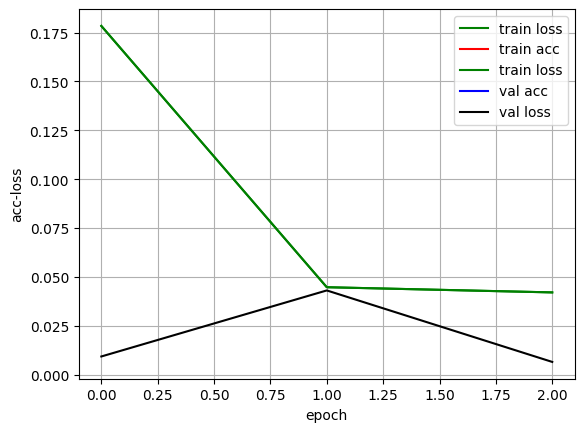

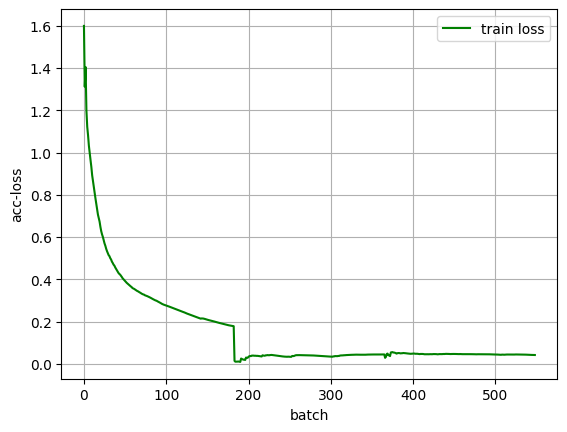

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

# Define the CNN model function
def cnn_by_own(input_shape, num_class, epochs, savepath='/kaggle/working/model_cnnown.keras'):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=input_shape, padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Train the model
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
    hist = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[earlyStopping, saveBestModel, history_this],
    )
    
    # Explicitly save the model to ensure it is saved correctly
    model.save('my_model.h5')  # Use .h5 extension for HDF5 format

    # Predict the validation data
    y_pred = model.predict(validation_generator)
    
    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = cnn_by_own(input_shape=INPUT_SIZE, num_class=5, epochs=10)

# Plot training loss
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# XCEPTION

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9696 - loss: 0.0934
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /kaggle/working/xception.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 121s 546ms/step - accuracy: 0.9697 - loss: 0.0930 - val_accuracy: 1.0000 - val_loss: 1.2350e-04
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 1.0000 - loss: 3.1264e-04
Epoch 2: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 79s 416ms/step - accuracy: 1.0000 - loss: 3.1236e-04 - val_accuracy: 1.0000 - val_loss: 2.3988e-05
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 1.0000 - loss: 1.0854e-04
Epoch 3: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 77s 409ms/step - accuracy: 1.0000 - loss: 1.0849e-04 - val_accuracy: 1.0000 - val_loss: 1.0052e-05
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 1.0000 - loss: 7.2948e-05
Epoch 4: val_accuracy did not improve from 1.00000
18

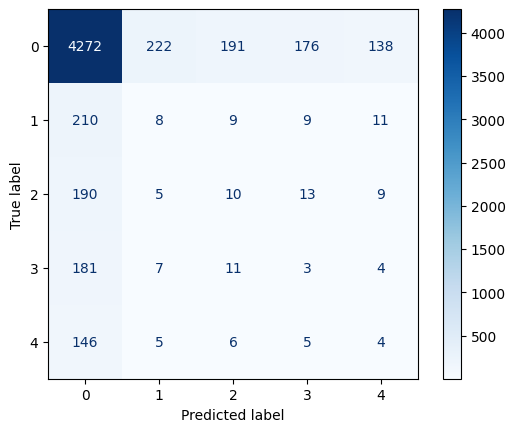

F1 Score (macro average): 0.19393438678497127
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4999
           1       0.03      0.03      0.03       247
           2       0.04      0.04      0.04       227
           3       0.01      0.01      0.01       206
           4       0.02      0.02      0.02       166

    accuracy                           0.74      5845
   macro avg       0.19      0.19      0.19      5845
weighted avg       0.74      0.74      0.74      5845



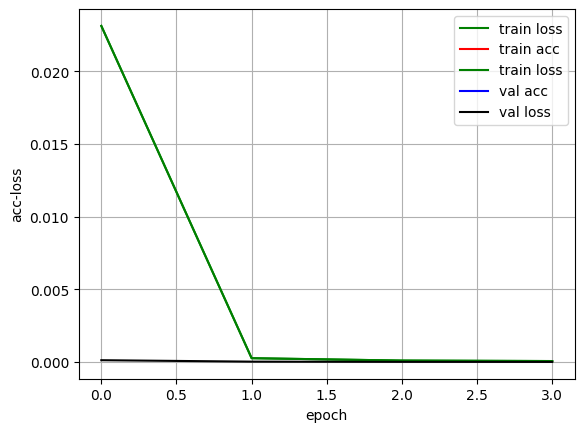

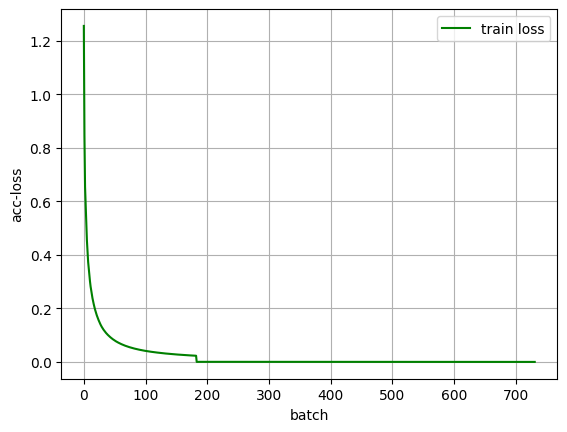

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import Xception
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def xception(num_class, epochs, savepath='/kaggle/working/xception.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the Xception model with ImageNet weights
    model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:131]:  # Adjust as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[131:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='xception')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in HDF5 format
    model.save('my_xception_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)
    
    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = xception(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# VGG 16

Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.9569 - loss: 0.1541
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /kaggle/working/VGG16.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 101s 473ms/step - accuracy: 0.9570 - loss: 0.1535 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9867 - loss: 0.1363
Epoch 2: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 78s 411ms/step - accuracy: 0.9868 - loss: 0.1360 - val_accuracy: 1.0000 - val_loss: 6.9431e-05
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9989 - loss: 0.0107
Epoch 3: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 78s 411ms/step - accuracy: 0.9989 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3: early stopping
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 324ms/step


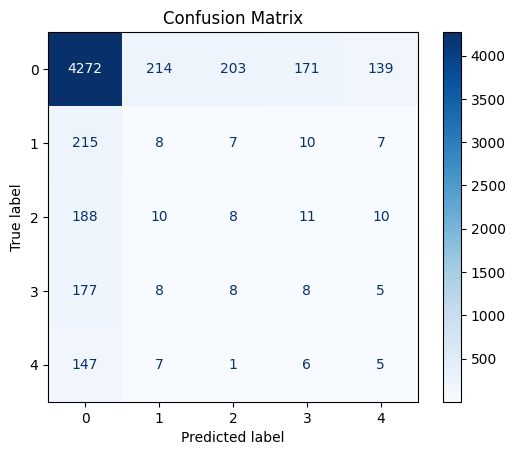

F1 Score (macro average): 0.1982314604566736
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4999
           1       0.03      0.03      0.03       247
           2       0.04      0.04      0.04       227
           3       0.04      0.04      0.04       206
           4       0.03      0.03      0.03       166

    accuracy                           0.74      5845
   macro avg       0.20      0.20      0.20      5845
weighted avg       0.74      0.74      0.74      5845



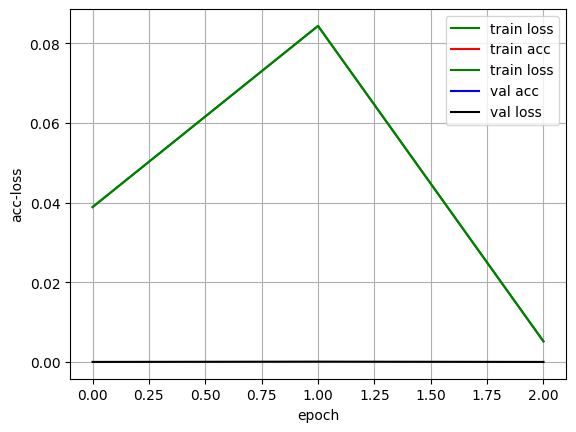

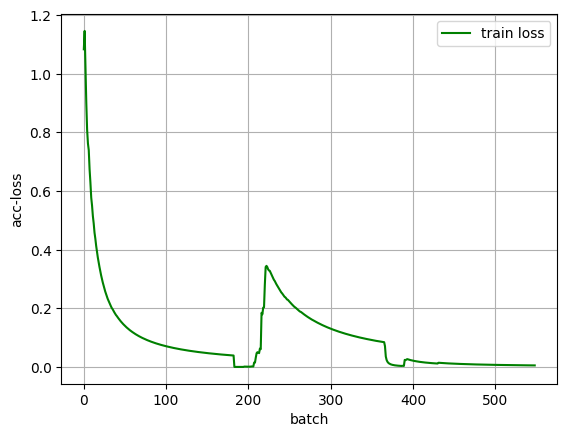

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def vgg16(num_class, epochs, savepath='/kaggle/working/VGG16.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the VGG16 model with ImageNet weights
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:15]:  # Adjust as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[15:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='vgg')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in HDF5 format
    model.save('my_vgg16_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)
    
    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = vgg16(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# VGG 19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9566 - loss: 0.1214
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /kaggle/working/VGG19.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 85s 432ms/step - accuracy: 0.9567 - loss: 0.1208 - val_accuracy: 1.0000 - val_loss: 1.1217e-09
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 1.0000 - loss: 1.9738e-05
Epoch 2: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 78s 412ms/step - accuracy: 1.0000 - loss: 1.9723e-05 - val_accuracy: 1.0000 - val_loss: 4.2830e-10
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 1.0000 - loss: 3.9655e-07
Epoch 3: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 78s 412ms/step - accuracy: 1.0000 - loss: 3.9731e-07 - val_accuracy: 1.0000 - val_loss: 2.0395e-11
Epoch 3: early stopping
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 325ms/step


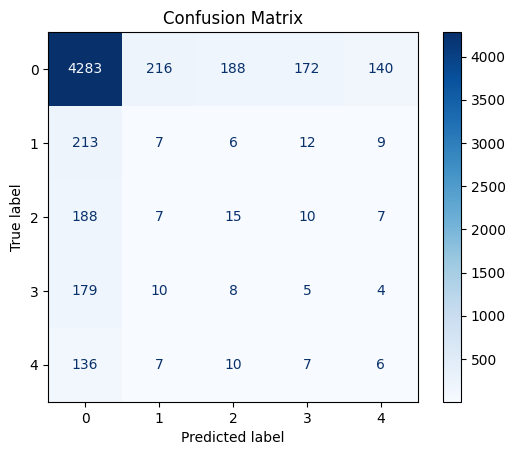

F1 Score (macro average): 0.20232143067402925
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4999
           1       0.03      0.03      0.03       247
           2       0.07      0.07      0.07       227
           3       0.02      0.02      0.02       206
           4       0.04      0.04      0.04       166

    accuracy                           0.74      5845
   macro avg       0.20      0.20      0.20      5845
weighted avg       0.74      0.74      0.74      5845



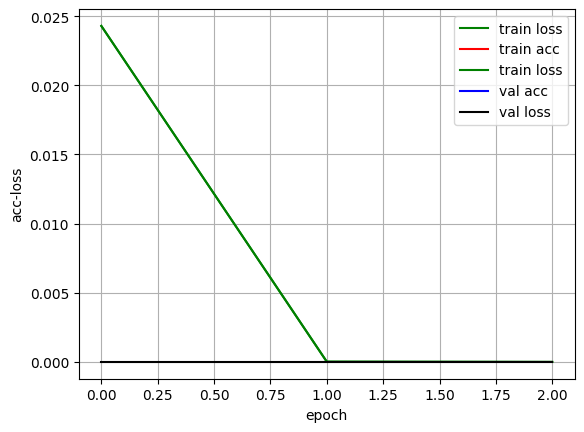

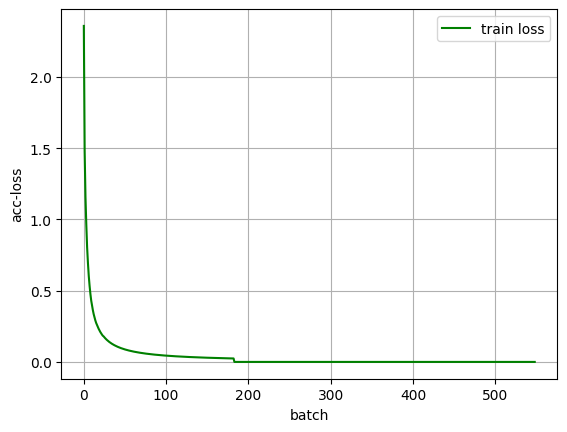

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import VGG19
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def vgg19(num_class, epochs, savepath='/kaggle/working/VGG19.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the VGG19 model with ImageNet weights
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:19]:  # Adjust the number of frozen layers as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='vgg19')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in HDF5 format
    model.save('my_vgg19_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)

    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = vgg19(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# RESSNET

Epoch 1/10


2024-10-30 14:18:54.608327: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[128,1024,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,2048,7,7]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-30 14:18:55.522820: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.914686576s
Trying algorithm eng0{} for conv (f32[128,1024,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,2048,7,7]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

  1/183 ━━━━━━━━━━━━━━━━━━━━ 1:49:07 36s/step - accuracy: 0.0938 - loss: 1.8822

2024-10-30 14:19:11.916760: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[87,1024,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[87,2048,7,7]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-10-30 14:19:12.192920: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.276347248s
Trying algorithm eng0{} for conv (f32[87,1024,14,14]{3,2,1,0}, u8[0]{0}) custom-call(f32[87,2048,7,7]{3,2,1,0}, f32[2048,1024,1,1]{3,2,1,0}), window={size=1x1 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_con

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.9014 - loss: 0.3347
Epoch 1: val_accuracy improved from -inf to 0.89410, saving model to /kaggle/working/resnet.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 135s 545ms/step - accuracy: 0.9017 - loss: 0.3334 - val_accuracy: 0.8941 - val_loss: 67.4984
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9997 - loss: 0.0016
Epoch 2: val_accuracy did not improve from 0.89410
183/183 ━━━━━━━━━━━━━━━━━━━━ 77s 410ms/step - accuracy: 0.9997 - loss: 0.0016 - val_accuracy: 0.8941 - val_loss: 2.7962
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.9852 - loss: 0.0529
Epoch 3: val_accuracy did not improve from 0.89410
183/183 ━━━━━━━━━━━━━━━━━━━━ 77s 407ms/step - accuracy: 0.9852 - loss: 0.0528 - val_accuracy: 0.0284 - val_loss: 538.7250
Epoch 3: early stopping
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step


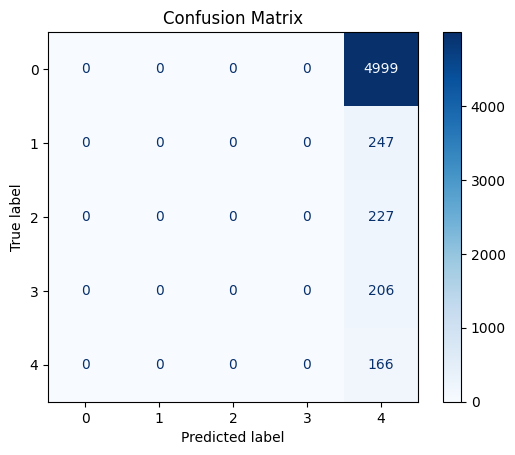

F1 Score (macro average): 0.011046414906005657
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4999
           1       0.00      0.00      0.00       247
           2       0.00      0.00      0.00       227
           3       0.00      0.00      0.00       206
           4       0.03      1.00      0.06       166

    accuracy                           0.03      5845
   macro avg       0.01      0.20      0.01      5845
weighted avg       0.00      0.03      0.00      5845



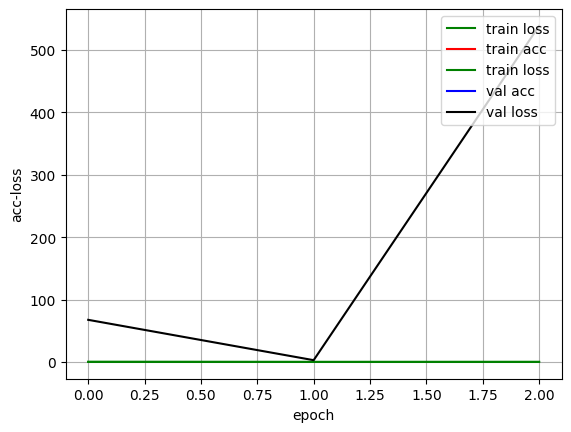

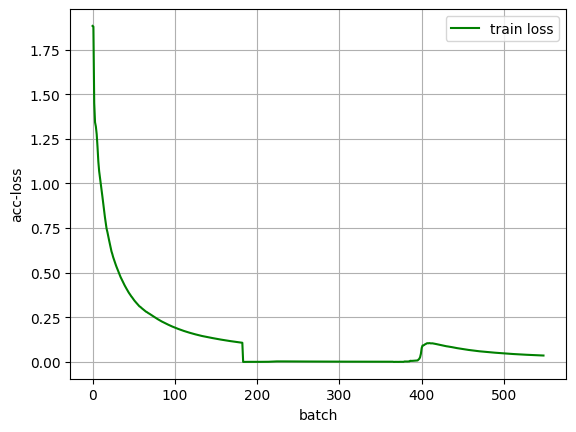

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def resnet(num_class, epochs, savepath='/kaggle/working/resnet.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the ResNet50 model with ImageNet weights
    model_fine_tune = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:120]:  # Adjust the number of frozen layers as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[120:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='resnet')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in HDF5 format
    model.save('my_resnet_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)

    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = resnet(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# INCEPTION

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


I0000 00:00:1730298407.032555      95 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_18', 12 bytes spill stores, 24 bytes spill loads



150/183 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.9552 - loss: 0.1157

I0000 00:00:1730298491.685919      93 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_19', 12 bytes spill stores, 24 bytes spill loads



183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9610 - loss: 0.1046
Epoch 1: val_accuracy improved from -inf to 0.03524, saving model to /kaggle/working/inception.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 197s 683ms/step - accuracy: 0.9612 - loss: 0.1043 - val_accuracy: 0.0352 - val_loss: 22497.4258
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9942 - loss: 0.0318
Epoch 2: val_accuracy improved from 0.03524 to 1.00000, saving model to /kaggle/working/inception.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 81s 430ms/step - accuracy: 0.9942 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9957 - loss: 0.0365
Epoch 3: val_accuracy did not improve from 1.00000
183/183 ━━━━━━━━━━━━━━━━━━━━ 79s 421ms/step - accuracy: 0.9957 - loss: 0.0364 - val_accuracy: 0.9935 - val_loss: 0.0237
Epoch 4/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.9996 - loss: 0.0024
Epoch 4: val_accuracy did not improve 

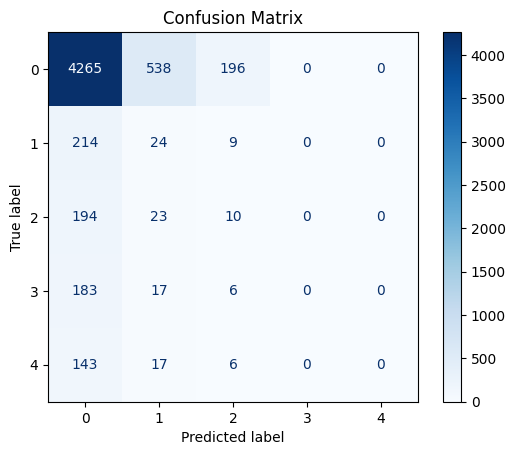

F1 Score (macro average): 0.19053014985901007
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4999
           1       0.04      0.10      0.06       247
           2       0.04      0.04      0.04       227
           3       0.00      0.00      0.00       206
           4       0.00      0.00      0.00       166

    accuracy                           0.74      5845
   macro avg       0.19      0.20      0.19      5845
weighted avg       0.73      0.74      0.73      5845



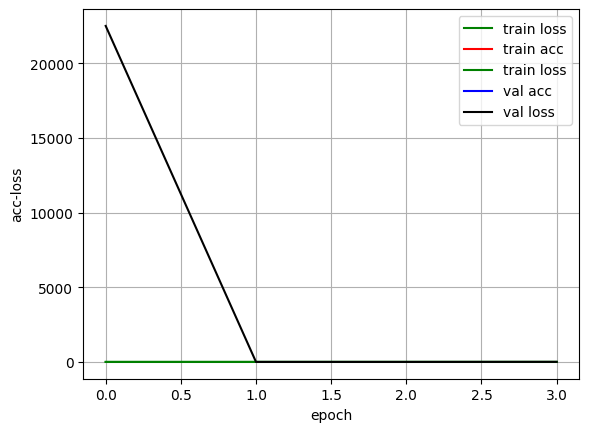

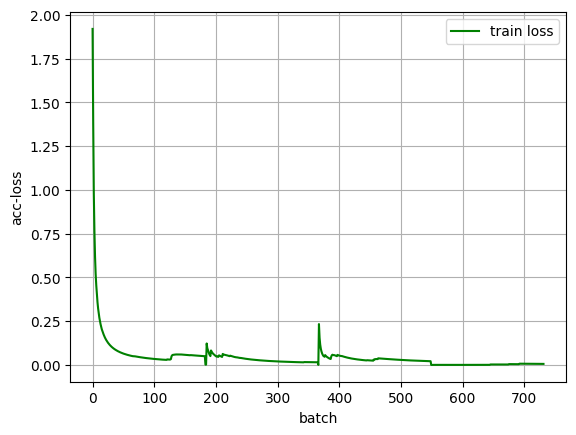

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def inception(num_class, epochs, savepath='/kaggle/working/inception.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the InceptionV3 model with ImageNet weights
    model_fine_tune = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:35]:  # Adjust the number of frozen layers as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[35:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='inception')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        
        epochs=epochs,
        validation_data=validation_generator,
        
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in Keras format
    model.save('my_inception_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)

    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = inception(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()


# INCEPTION RESNET

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9635 - loss: 0.0881
Epoch 1: val_accuracy improved from -inf to 0.82532, saving model to /kaggle/working/inceptionresnet.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 230s 828ms/step - accuracy: 0.9636 - loss: 0.0878 - val_accuracy: 0.8253 - val_loss: 57066.5664
Epoch 2/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.9994 - loss: 0.0050
Epoch 2: val_accuracy improved from 0.82532 to 0.98648, saving model to /kaggle/working/inceptionresnet.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 105s 561ms/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.9865 - val_loss: 0.4471
Epoch 3/10
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.9981 - loss: 0.0138
Epoch 3: val_accuracy improved from 0.98648 to 0.99538, saving model to /kaggle/working/inceptionresnet.keras
183/183 ━━━━━━━━━━━━━━━━━━━━ 105s 562ms/step - accuracy: 0.9981 - loss: 0.0138 - val_accuracy: 0.9954 - val_lo

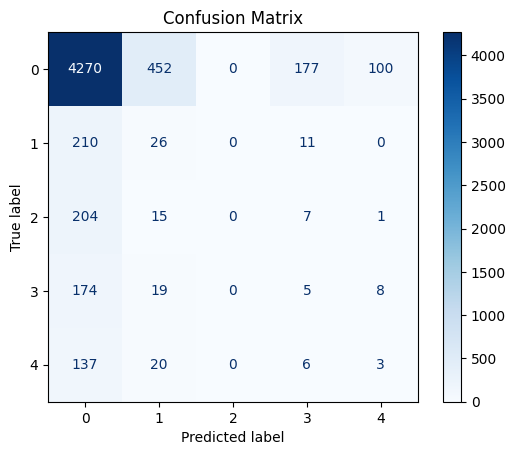

F1 Score (macro average): 0.19342390651351035
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4999
           1       0.05      0.11      0.07       247
           2       0.00      0.00      0.00       227
           3       0.02      0.02      0.02       206
           4       0.03      0.02      0.02       166

    accuracy                           0.74      5845
   macro avg       0.19      0.20      0.19      5845
weighted avg       0.73      0.74      0.74      5845



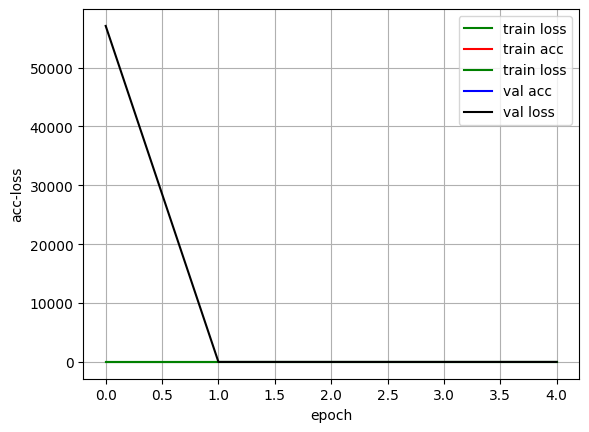

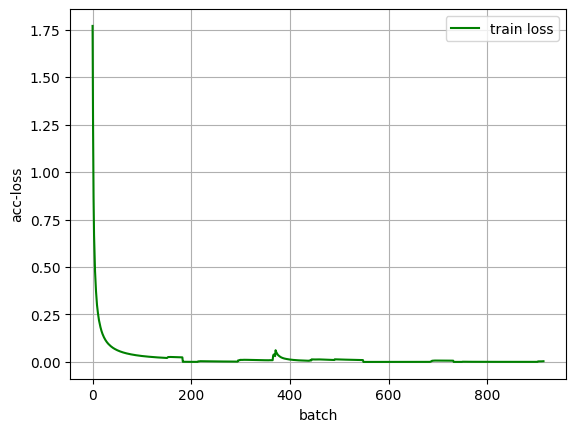

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import InceptionResNetV2
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
import keras

def inceptionresnet(num_class, epochs, savepath='/kaggle/working/inceptionresnet.keras', history=history_this, input_shape=INPUT_SIZE):
    # Load the InceptionResNetV2 model with ImageNet weights
    model_fine_tune = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers
    for layer in model_fine_tune.layers[:500]:  # Adjust the number of frozen layers as necessary
        layer.trainable = False
    for layer in model_fine_tune.layers[500:]:
        layer.trainable = True

    # Build the model
    x = GlobalAveragePooling2D()(model_fine_tune.output)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_class, activation='softmax')(x)

    model = Model(model_fine_tune.input, output, name='inceptionresnet')

    # Compile the model
    opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Set up callbacks
    earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    saveBestModel = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    hist = model.fit(
        train_generator,
        
        epochs=epochs,
        validation_data=validation_generator,
        
        callbacks=[earlyStopping, saveBestModel, history],
    )

    # Save the model in Keras format
    model.save('my_inceptionresnet_model.h5')

    # Make predictions on the validation data
    y_pred = model.predict(validation_generator)

    # Convert predictions from one-hot to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Get true labels from validation data
    y_true = validation_generator.classes

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Compute F1 score (macro average for multiple classes)
    f1 = f1_score(y_true, y_pred_classes, average='macro')
    print(f"F1 Score (macro average): {f1}")

    # Full classification report including precision, recall, f1-score for each class
    class_report = classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys())
    print("Classification Report:\n", class_report)

    return model  # Return the trained model

# Call the function to train and save the model
trained_model = inceptionresnet(num_class=5, epochs=10)

# Plot training history
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()
